<a href="https://colab.research.google.com/github/kilos11/Data_Science/blob/main/Advertising(LinearReg)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression on Advertising Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

In [ ]:
data = pd.read_csv("Ads.csv")

In [ ]:
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
data.shape

(200, 5)

In [ ]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:

data.drop(['Unnamed: 0'], axis=1)
# This line of code drops the column labeled 'Unnamed: 0' from the DataFrame 'data'
# The 'axis=1' parameter specifies that we are dropping a column, not a row
# After executing this code, the column 'Unnamed: 0' will be removed from the 'data' DataFrame

In [ ]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales'], c='green')
plt.xlabel("Money spent on TV ads in Dollars")
plt.ylabel("Sales in Dollars")
plt.show()

In [ ]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.04753664043301975
7.032593549127695
The linear model is: Y = 7.0326 + 0.047537X


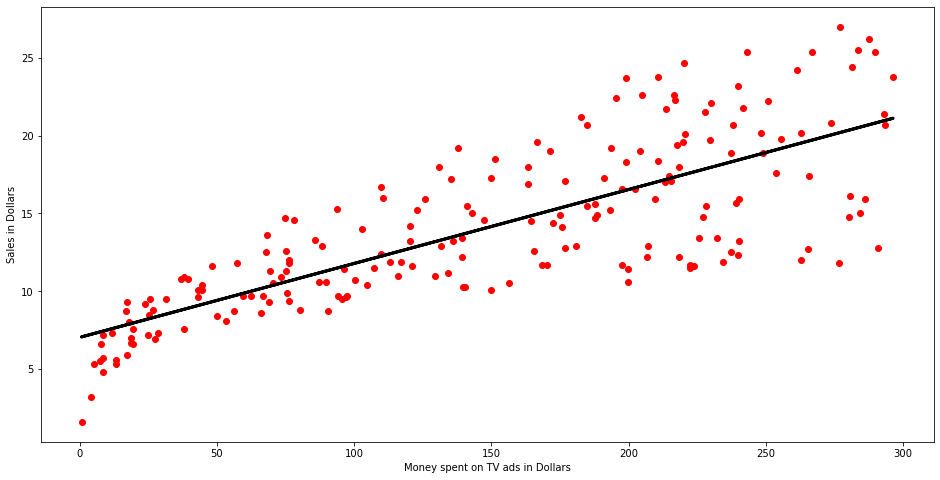

In [ ]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter( data['TV'], data['sales'], color='red')
plt.plot( data['TV'], predictions, c='black', linewidth=3)
plt.xlabel("Money spent on TV ads in Dollars")
plt.ylabel("Sales in Dollars")
plt.show()

In [ ]:

# Assign the 'TV' column of the 'data' DataFrame to the variable 'X'
X = data['TV']

# Assign the 'sales' column of the 'data' DataFrame to the variable 'y'
y = data['sales']

# Add a constant column to the 'X' variable using the sm.add_constant() function
X2 = sm.add_constant(X)

# Create an Ordinary Least Squares (OLS) model using the sm.OLS() function
EST = sm.OLS(y, X2)

# Fit the model to the data and obtain the results using the fit() method
EST2 = EST.fit()

# Print the summary of the model using the summary() method
print(EST2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        09:21:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]


In [ ]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [ ]:
reg.score(Xs, y)

0.8972106381789521

In [ ]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        09:21:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0